In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 設置中文字體為黑體
plt.rcParams['axes.unicode_minus'] = False     # 解決負號顯示問題


#### Data Understanding

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.info())
print(train.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

#### Data Preparation

In [3]:
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

train['Fare'].fillna(train['Fare'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)


# 特徵工程
# 將性別轉換為數值
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
test['Sex'] = le.fit_transform(test['Sex'])


# 選擇特徵
non_value_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']

correlations = train[non_value_features].corr()['Survived'].abs().sort_values(ascending=False)
threshold = 0.2  # 可以根據需要調整閾值
selected_features_corr = correlations[correlations > threshold].index.tolist()
print(selected_features_corr[1:])

# features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X_train = train[selected_features_corr[1:]]
y_train = train['Survived']

X_val = test[selected_features_corr[1:]]

['Sex', 'Pclass', 'Fare']


C:\Users\cah\AppData\Local\Temp\ipykernel_39876\2999684515.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\cah\AppData\Local\Temp\ipykernel_39876\2999684515.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

#### Modeing

In [4]:
model = LogisticRegression(random_state=456)
# model = LinearRegression()
model.fit(X_train, y_train)

LogisticRegression(random_state=456)

#### Evaluation


In [5]:
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Training acc : ", accuracy)

Training acc :  0.7867564534231201


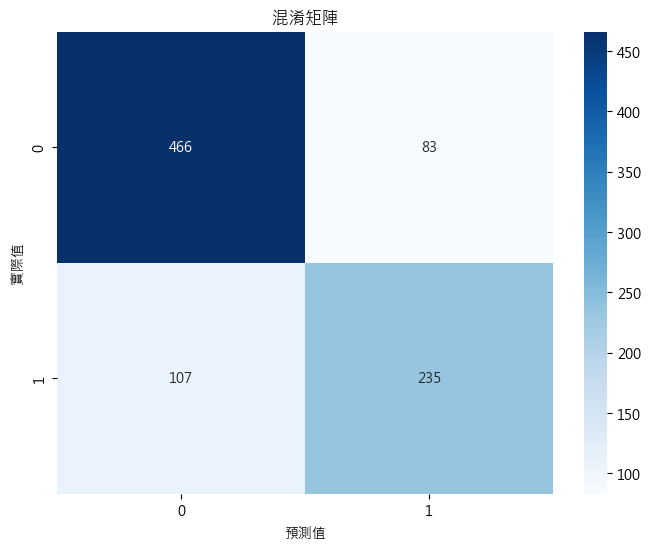

In [6]:
# 繪製混淆矩陣
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('混淆矩陣')
plt.ylabel('實際值')
plt.xlabel('預測值')
plt.show()

#### Deployment

In [7]:
# 對測試集進行預測
test_predictions = model.predict(X_val)

# 創建提交文件
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': test_predictions
})
submission.to_csv('submission.csv', index=False)